In [62]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
import numpy as np

In [17]:
df_students_take_tests = pd.read_csv("../tables_creation/final_tables/students_take_tests.csv")
df_students = pd.read_csv("../tables_creation/final_tables/students.csv")

C:\Users\Admin\AppData\Local\Temp\ipykernel_21252\3529048147.py:2: DtypeWarning: Columns (3,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df_students = pd.read_csv("../tables_creation/final_tables/students.csv")


For this analyses, we condsider only the results of one test, which is obligatory for all students who want to join university: Ukrainian language test.

Note, that before 2021 the test also included tasks of Ukrainian literature; from 2021, the test includes only Ukrainian language tasks.

In [18]:
df_students_take_tests_ukr = df_students_take_tests.loc[df_students_take_tests['test_subject'] == 'ukrtest']
df_students_take_tests_math = df_students_take_tests.loc[df_students_take_tests['test_subject'] == 'mathtest']
df_students_take_tests_hist = df_students_take_tests.loc[df_students_take_tests['test_subject'] == 'histtest']

In [19]:
df_merged_ukr = df_students_take_tests_ukr.merge(df_students, how='left', on='outid')
df_merged_ukr.drop(columns=['year_y'], inplace=True)
df_merged_ukr.rename(columns={'year_x': 'year'}, inplace=True)
df_merged_ukr

,outid,year,score100,score12,score,test_status,test_subject,test_type,KOATUU_2020_test_center,EDRPOU_test_center,birth,sextypename,classprofilename,regtypename,classlangname,KOATUU_2020,EDRPOU_school
0,00000AC7-CDDE-4C77-B979-8B0351AF1305,2017,161.0,9.0,NaN,Accepted,ukrtest,EIE,5.110137e+09,20995060.0,2000,Female,Інший,A graduate of an Ukrainian school of the curre...,Ukrainian,5110136900,NaN
1,00000dce-36de-4d58-9dc2-7ffc824f597a,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,1.810700e+09,22061344.0,2004,Male,Foreign philology,A graduate of an Ukrainian school of the curre...,Ukrainian,1822380901,NaN
2,00001a8d-fff5-4c7c-bea2-b0157f7c5655,2021,128.0,6.0,31.0,Accepted,ukrtest,EIE,7.110136e+09,25922746.0,2002,Male,Skilled worker,graduate of a vocational school,Ukrainian,7110136700,NaN
3,0000268f-9fdd-49b2-9ee2-422778c9c4f1,2016,160.0,8.0,NaN,Accepted,ukrtest,EIE,6.310137e+09,24486622.0,1998,Male,NaN,A graduate of an Ukrainian school of the curre...,NaN,6310136300,NaN
4,0000324e-f525-49c4-a963-8df0cc02d6d5,2018,166.0,9.0,69.0,Accepted,ukrtest,EIE,4.611200e+09,34387362.0,2001,Male,Mathematics,A graduate of an Ukrainian school of the curre...,Ukrainian,4611200000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457043,ffffeb30-6810-4054-b0b3-04c13a450c85,2022,142.0,NaN,14.0,Accepted,ukrtest,NMT,1.811000e+09,NaN,2005,Female,NaN,Student of a higher/vocational pre-higher educ...,NaN,1824087401,NaN
2457044,ffffeeb2-7258-4465-bca3-88dd19902340,2019,169.0,10.0,70.0,Accepted,ukrtest,EIE,1.210138e+09,26508368.0,2002,Male,Economics,A graduate of an Ukrainian school of the curre...,Russian,1210136600,NaN
2457045,fffff6db-6fcc-481f-aa92-49906c0ad1c8,2021,NaN,NaN,NaN,Absent,ukrtest,EIE,4.610138e+09,2545659.0,2003,Female,Skilled worker,graduate of a vocational school,Ukrainian,4610136300,NaN
2457046,fffff7dc-0331-41bb-aa5e-e51024ac605e,2021,128.0,NaN,31.0,Accepted,ukrtest,EIE,7.101000e+08,23253324.0,2004,Female,Junior specialist,A student of a higher education institution,Ukrainian,710100000,NaN


In [20]:
df_merged_ukr = df_merged_ukr.loc[df_merged_ukr['test_status'].isin(['Absent', 'Accepted', 'Canceled', 'Failed'])]
pd.pivot_table(df_merged_ukr, values=['outid'], index=['test_status'], columns=['year'], aggfunc='count')

outid                                                        
year           2016    2017    2018    2019    2020    2021    2022    2023
test_status                                                                
Absent        13187    9992    9815    9980   95071   83321   19997   20716
Accepted     230634  212569  276433  286413  251929  267635  213927  267871
Canceled        145     254     327     527      29      93      33      91
Failed        23033   17137   46598   52445   22525   21202     147     257

Test statuses for each year include:
- Absent: student registered but didn't come to the test
- Accepted: student came to the test and reached the threshold
- Canceled: student came to the test, and her/his work was canceled due violation of rules (we'll consider this as Failed)
- Failed: student came to the test and didn't reach the threshold

In [21]:
df_merged_ukr.loc[df_merged_ukr['test_status'] == 'Canceled', 'test_status'] = 'Failed'

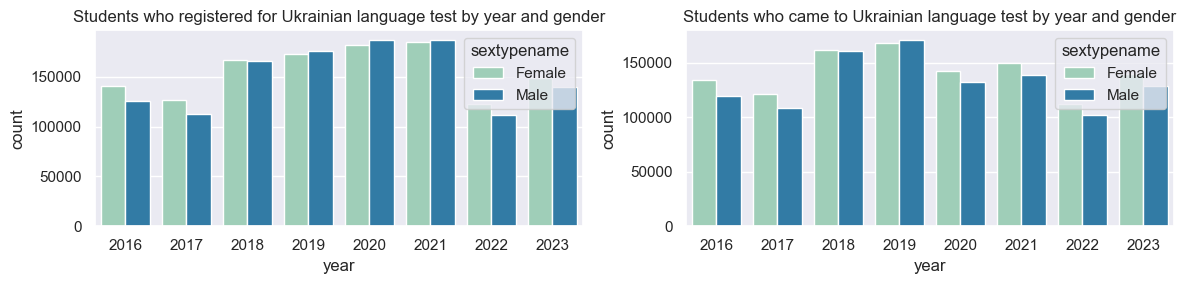

In [64]:
figure_dims = (12, 3)
fig, axs = plt.subplots(ncols=2, figsize=figure_dims)
sns.countplot(df_merged_ukr, x="year", hue="sextypename", palette='YlGnBu', ax=axs[0]).set(title='Students who registered for Ukrainian language test by year and gender')
sns.countplot(df_merged_ukr.loc[df_merged['test_status'].isin(['Accepted', 'Failed'])], x="year", hue="sextypename", palette='YlGnBu', ax=axs[1]).set(title='Students who came to Ukrainian language test by year and gender')
fig.tight_layout()
plt.show()

[Text(0.5, 1.0, "Students who didn't come to the Ukrainian language test by year and gender")]

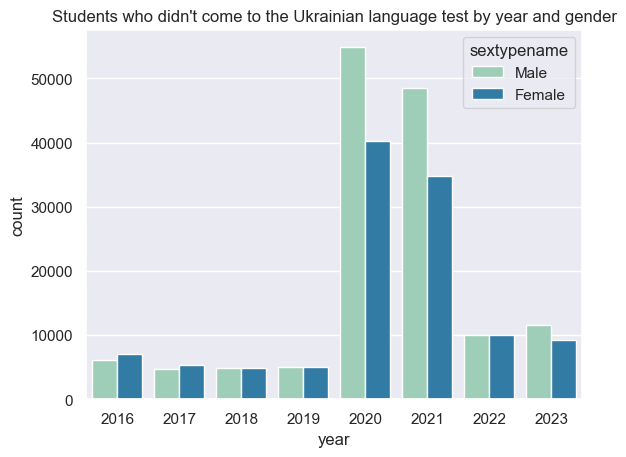

In [65]:
sns.countplot(df_merged_ukr.loc[df_merged_ukr['test_status'] == 'Absent'], x="year", hue="sextypename", palette='YlGnBu').set(title="Students who didn't come to the Ukrainian language test by year and gender")

In all the years except for 2020-2021 (covid times) the Ukrainian lenguage EIE test was obligatory for students to finish the schoool. In 2020 and 2021 this rule was changed after the registration, which caused the significant difference between students who registered to the test and came to it.

[Text(0.5, 1.0, 'Results of Ukrainian language test by year and gender')]

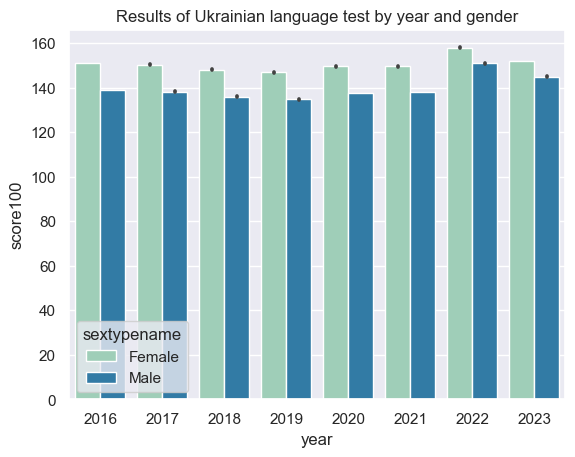

In [66]:
sns.barplot(df_merged_ukr.loc[df_merged_ukr['test_status'] == 'Accepted'], x="year", y="score100", estimator='mean', hue="sextypename", palette='YlGnBu').set(title='Results of Ukrainian language test by year and gender')

Note, that relative scores in 200-points scale are used for the plot, and only results of students who reached the threshold are considered. As each year has different system of scaling into 200-points scale, this plot can only be used for comparison of the difference between results by gender during the years.

In [26]:
df_merged_came_to_test_ukr = df_merged_ukr.loc[df_merged_ukr['test_status'].isin(['Accepted', 'Failed'])]
df_failure_rate_ukr = df_merged_came_to_test_ukr.groupby(["sextypename", "year", "test_status"]).test_status.count().unstack().fillna(0)
df_failure_rate_ukr['Failure_rate'] = df_failure_rate_ukr['Failed'] / (df_failure_rate_ukr['Accepted'] + df_failure_rate_ukr['Failed'])
df_failure_rate_ukr.reset_index(inplace=True)

In [27]:
df_failure_rate_sum_ukr = df_failure_rate_ukr.groupby(by=['year']).sum()
df_failure_rate_sum_ukr['Failure_rate'] = df_failure_rate_sum_ukr['Failed'] / (df_failure_rate_sum_ukr['Failed'] + df_failure_rate_sum_ukr['Accepted'])

[Text(0.5, 1.0, 'Failure rate of Ukrainian language test by year')]

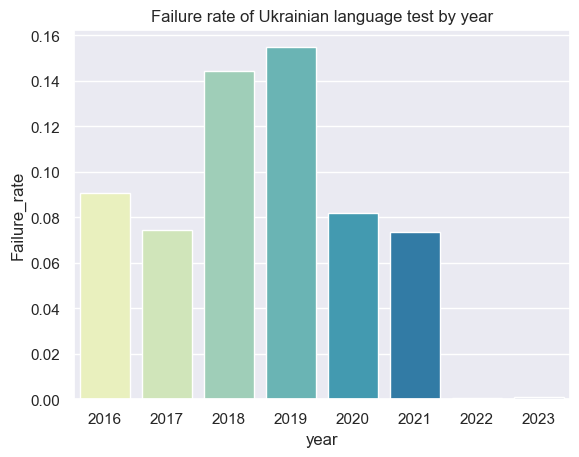

In [67]:
sns.barplot(df_failure_rate_sum_ukr, x=df_failure_rate_sum_ukr.index, y="Failure_rate", palette='YlGnBu').set(title='Failure rate of Ukrainian language test by year')

[Text(0.5, 1.0, 'Failure rate of Ukrainian language test by year and gender')]

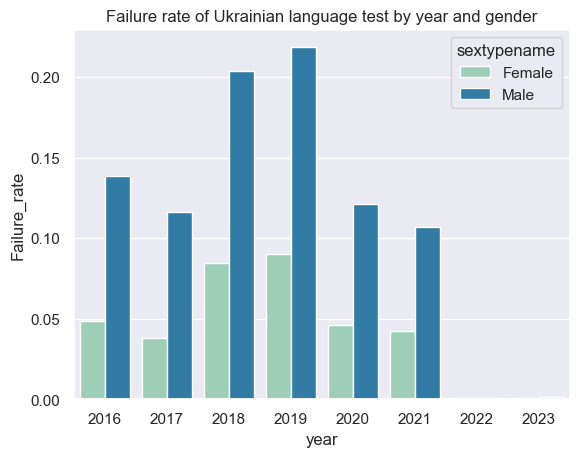

In [68]:
sns.barplot(df_failure_rate_ukr, x="year", y="Failure_rate", hue="sextypename", palette='YlGnBu').set(title='Failure rate of Ukrainian language test by year and gender')

Every year the threshold for passing the test is different and is determined by special comission after the test. In 2022 and 2023 the threshold was low to allow students to pass the test and apply to the universitities which require minimum scores. In 2022, the threshold was 1 point; in 2023 the threshold for Ukrainian language test was 5 points.

Only results of students who came to the test are considered.

Same plots for Math and History of Ukraine tests:

[Text(0.5, 1.0, 'Failure rate of Math test by year and gender')]

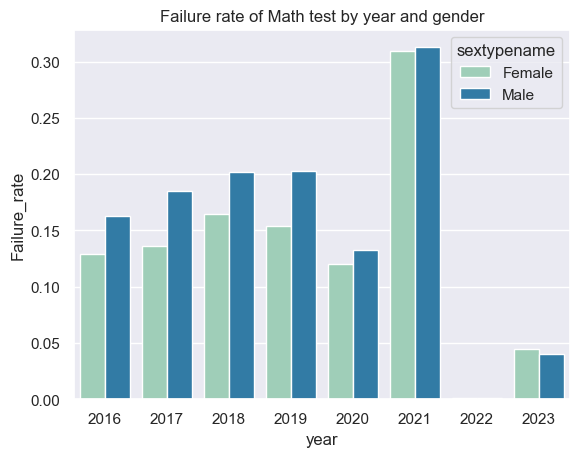

In [69]:
df_merged_math = df_students_take_tests_math.merge(df_students, how='left', on='outid')
df_merged_math.drop(columns=['year_y'], inplace=True)
df_merged_math.rename(columns={'year_x': 'year'}, inplace=True)
df_merged_math = df_merged_math.loc[df_merged_math['test_status'].isin(['Absent', 'Accepted', 'Canceled', 'Failed'])]
df_merged_math.loc[df_merged_math['test_status'] == 'Canceled', 'test_status'] = 'Failed'

df_merged_came_to_test_math = df_merged_math.loc[df_merged_math['test_status'].isin(['Accepted', 'Failed'])]
df_failure_rate_math = df_merged_came_to_test_math.groupby(["sextypename", "year", "test_status"]).test_status.count().unstack().fillna(0)
df_failure_rate_math['Failure_rate'] = df_failure_rate_math['Failed'] / (df_failure_rate_math['Accepted'] + df_failure_rate_math['Failed'])
df_failure_rate_math.reset_index(inplace=True)

sns.barplot(df_failure_rate_math, x="year", y="Failure_rate", hue="sextypename", palette='YlGnBu').set(title='Failure rate of Math test by year and gender')

[Text(0.5, 1.0, 'Failure rate of History of Ukraine test by year and gender')]

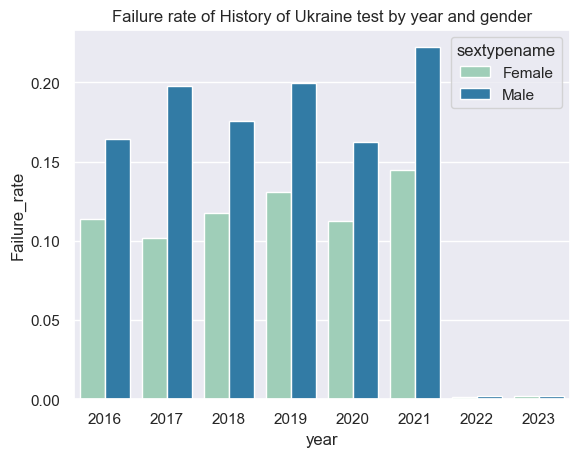

In [70]:
df_merged_hist = df_students_take_tests_hist.merge(df_students, how='left', on='outid')
df_merged_hist.drop(columns=['year_y'], inplace=True)
df_merged_hist.rename(columns={'year_x': 'year'}, inplace=True)
df_merged_hist = df_merged_hist.loc[df_merged_hist['test_status'].isin(['Absent', 'Accepted', 'Canceled', 'Failed'])]
df_merged_hist.loc[df_merged_hist['test_status'] == 'Canceled', 'test_status'] = 'Failed'

df_merged_came_to_test_hist = df_merged_hist.loc[df_merged_hist['test_status'].isin(['Accepted', 'Failed'])]
df_failure_rate_hist = df_merged_came_to_test_hist.groupby(["sextypename", "year", "test_status"]).test_status.count().unstack().fillna(0)
df_failure_rate_hist['Failure_rate'] = df_failure_rate_hist['Failed'] / (df_failure_rate_hist['Accepted'] + df_failure_rate_hist['Failed'])
df_failure_rate_hist.reset_index(inplace=True)

sns.barplot(df_failure_rate_hist, x="year", y="Failure_rate", hue="sextypename", palette='YlGnBu').set(title='Failure rate of History of Ukraine test by year and gender')